In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
#import fakeGalaxy
#reload(fakeGalaxy)
import numpy as np
#import seWrapper
import gcSampler
import densityGC
import densityFG
import subprocess as sp
import SourceCompleteness
import corner
import pickle
import seaborn as sea
#reload(seWrapper)
#reload(gcSampler)
#reload(densityGC)
#reload(densityFG)
#reload(SourceCompleteness)

In [54]:
n4365_data = np.genfromtxt('n4365_catalog.dat')

g_43 = n4365_data[:,12]
r_43 = n4365_data[:,14]
i_43 = n4365_data[:,16]

good = (g_43 > 15) & (r_43 > 15) & (i_43 > 15)

gi_43 = g_43 - i_43
ri_43 = r_43 - i_43

n43_data = np.vstack([gi_43,ri_43]).T
n43_data = n43_data[good,:]

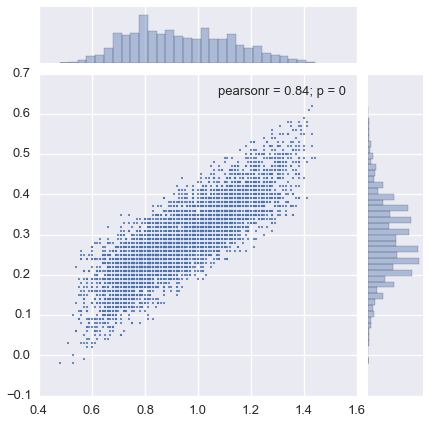

In [60]:
sea.jointplot(n43_data[:,0],n43_data[:,1],s=3)

In [26]:
data = np.genfromtxt('phot.dat',dtype=str)
g = []
for j in data[:,2]:
    g.append(float(j.split('±')[0]))
    
r = []
for j in data[:,3]:
    r.append(float(j.split('±')[0]))
    
i = []
for j in data[:,4]:
    i.append(float(j.split('±')[0]))

g = np.array(g)
r = np.array(r)
i = np.array(i)

gi = g-i
ri = r-i

phot_data = np.stack([g-i,r-i],axis=1)

mask = (phot_data[:,0] > 0.6) & (phot_data[:,0] < 1.2) & \
                     (phot_data[:,1] > 0.15) & (phot_data[:,1] < 0.5)

phot_data = phot_data[mask]

In [27]:
print phot_data.shape

(397, 2)


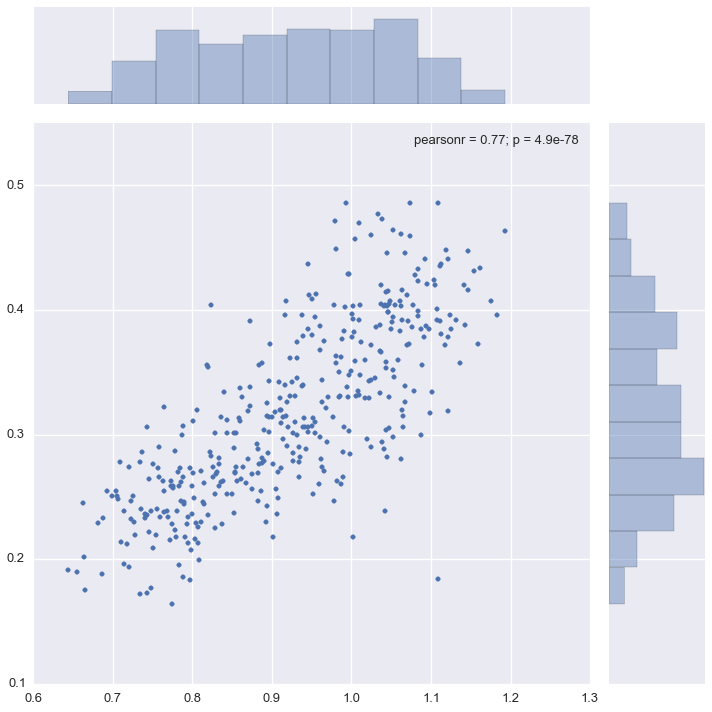

In [41]:
sea.set_context('talk')
jp = sea.jointplot(phot_data[:,0],phot_data[:,1],size=10)
jp.xlim=(0.6,1.4)
jp.ylim=(0.15,0.7)
jp.savefig('n4494_data.pdf')

In [153]:
gc = gcBimodal(n_walkers=100,data=phot_data)
gc.runSampler(3000,burn_steps=2000)
print gc.sampler.acceptance_fraction

mean_blue_gi median,  16 %, and  84 %  0.920190125354    0.91205833299    0.928138747741
mean_blue_ri median,  16 %, and  84 %  0.314824495393    0.31006067865    0.319482554689
sig^2_blue_gi median,  16 %, and  84 %  0.0163976249702    0.0151660008507    0.0177663841395
sig^2_blue_ri median,  16 %, and  84 %  0.0050005621276    0.00456086535503    0.0054884356763
cov_blue median,  16 %, and  84 %  0.00733770687396    0.00672534055872    0.00802877978449
mean_red_gi median,  16 %, and  84 %  1.07063264994    1.04000013683    1.1023465047
mean_red_ri median,  16 %, and  84 %  0.389970924549    0.370134050094    0.410343096264
sig^2_red_gi median,  16 %, and  84 %  0.0378889770819    0.0297864676597    0.0491445455334
sig^2_red_ri median,  16 %, and  84 %  0.0175949818502    0.0138725451992    0.0225663242372
cov_red median,  16 %, and  84 %  0.00440165880897    0.00172643584508    0.00815380963383
f_blue median,  16 %, and  84 %  0.858878253081    0.821614879098    0.89294135577
[ 0.381

/Users/zach/anaconda/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:177: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


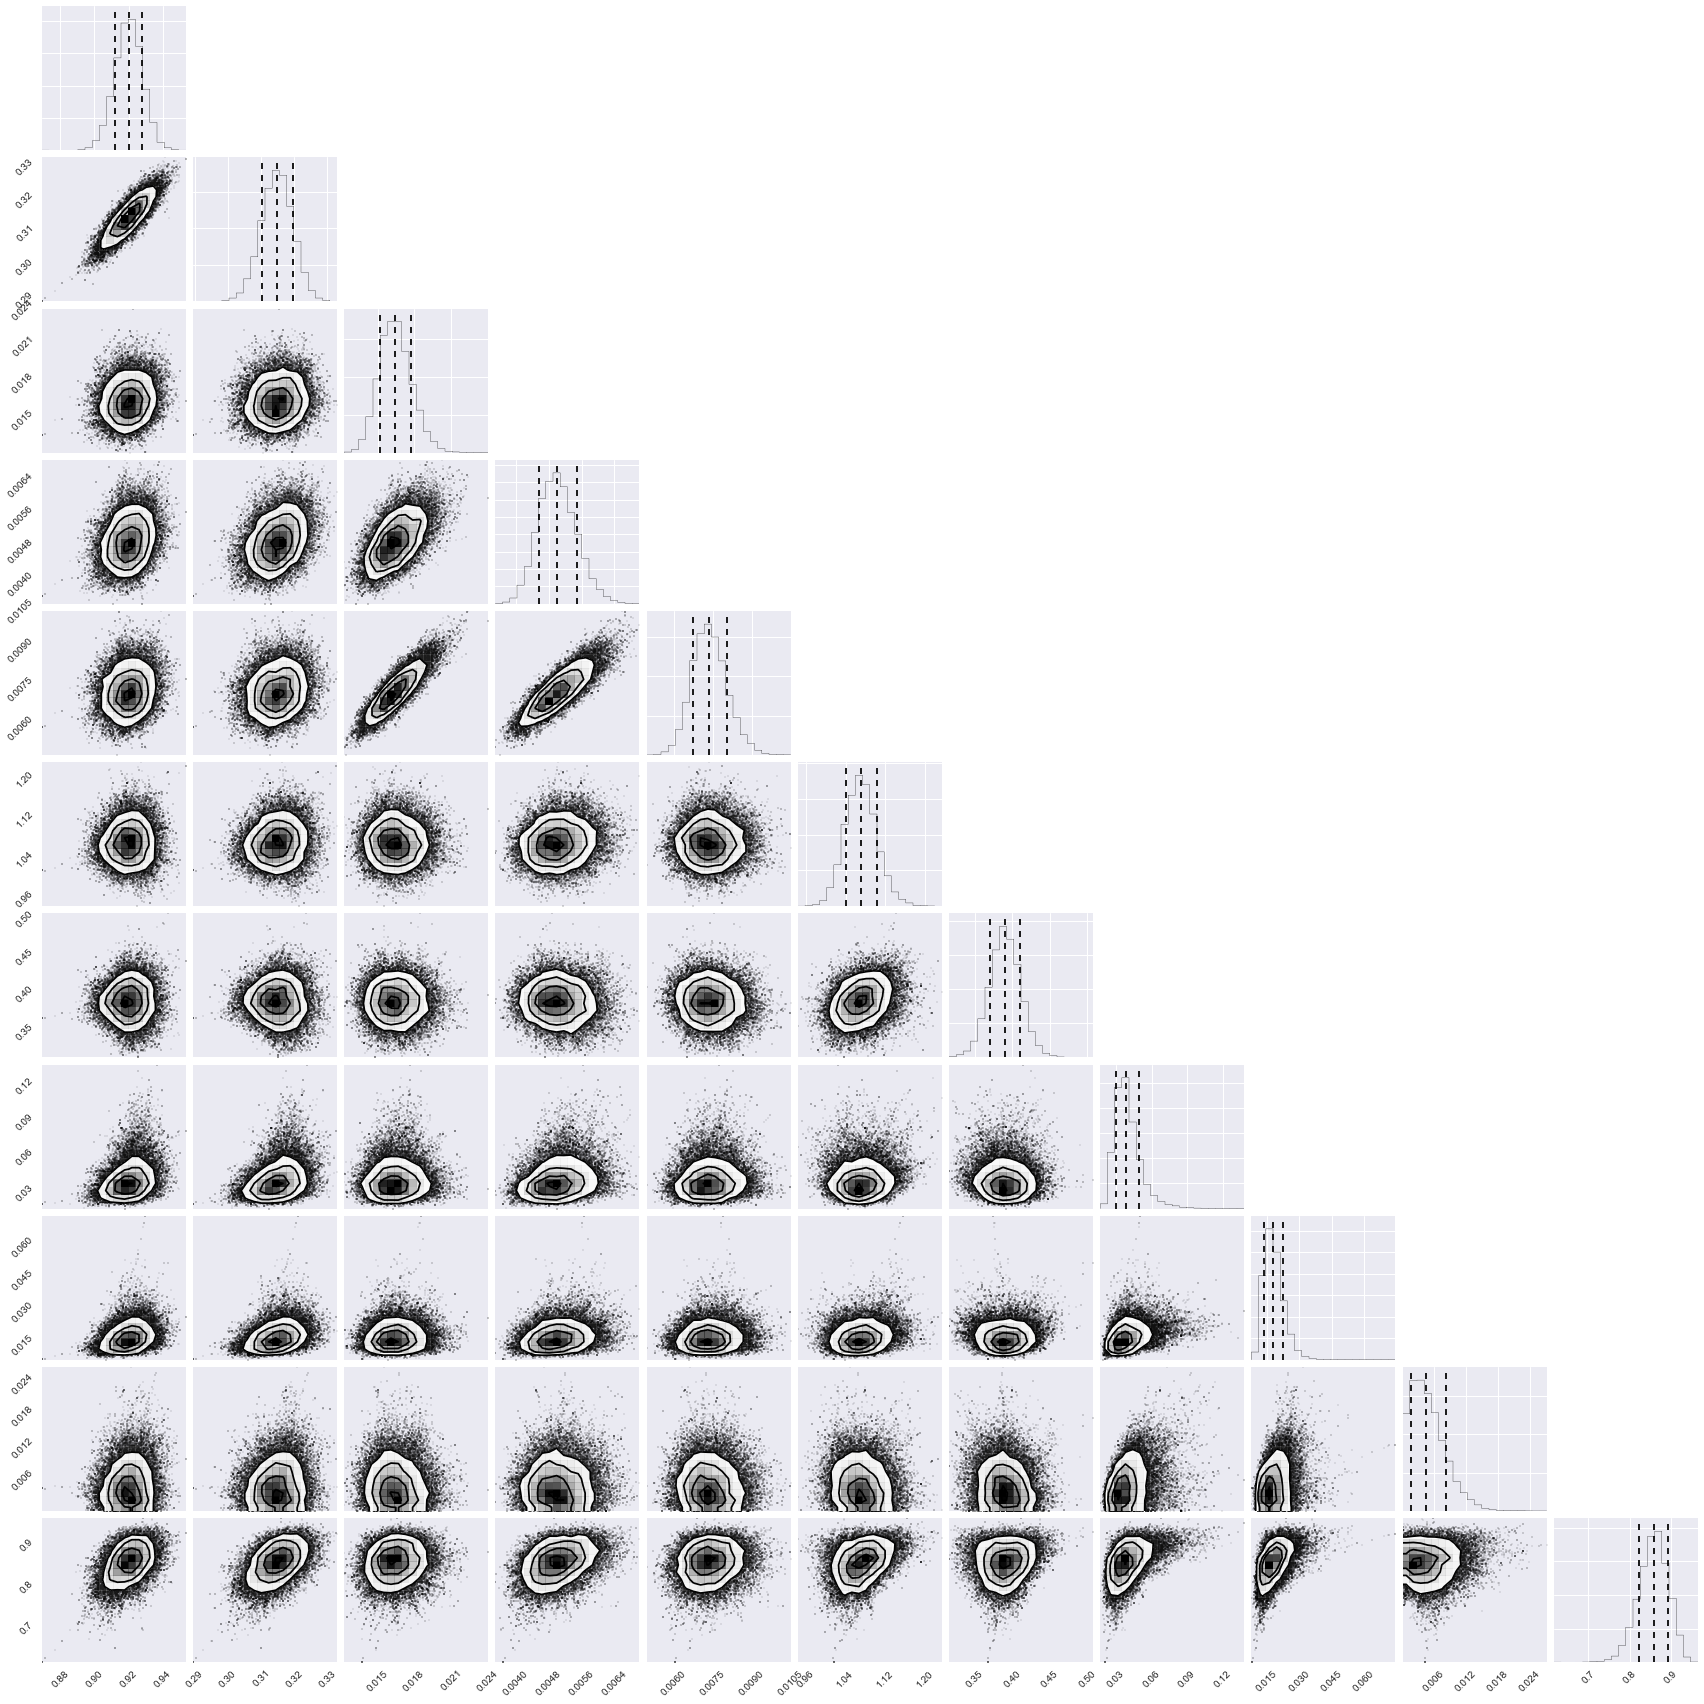

In [154]:
fig = corner.corner(gc.sampler.chain[:,2000:,:].reshape(-1,11),quantiles=[0.16, 0.5, 0.84])

IndexError: index 11 is out of bounds for axis 2 with size 11

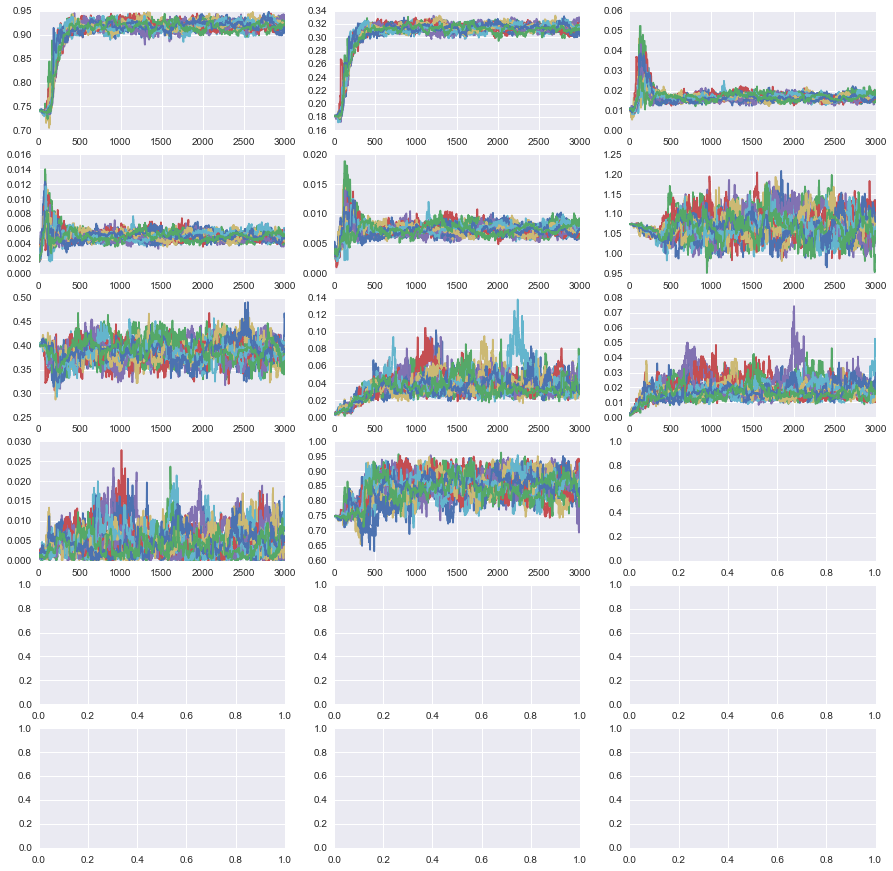

In [155]:
fig,ax = plt.subplots(figsize=(15,15),ncols=3,nrows=6,dpi=1000)

for i in range(17):
    for j in range(20):
        ax[i/3,i%3].plot(gc.sampler.chain[j,:,i])

(0.1, 0.6)

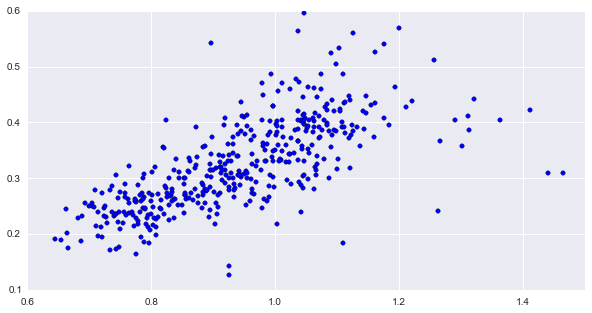

In [96]:
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(g-i,r-i)
ax.set_xlim(0.6,1.5)
ax.set_ylim(0.1,0.6)

(array([  0.,   0.,   1.,   4.,   0.,   4.,   8.,   8.,  11.,  11.,  15.,
         17.,  16.,  13.,  14.,  13.,  10.,  13.,  20.,  20.,  17.,  16.,
         12.,  18.,  20.,  14.,  14.,  27.,  19.,  12.,  13.,  13.,   5.,
          5.,   3.,   3.,   2.,   3.,   0.,   0.,   3.,   0.,   2.,   2.,
          1.,   0.,   1.,   0.,   0.]),
 array([ 0.6       ,  0.61632653,  0.63265306,  0.64897959,  0.66530612,
         0.68163265,  0.69795918,  0.71428571,  0.73061224,  0.74693878,
         0.76326531,  0.77959184,  0.79591837,  0.8122449 ,  0.82857143,
         0.84489796,  0.86122449,  0.87755102,  0.89387755,  0.91020408,
         0.92653061,  0.94285714,  0.95918367,  0.9755102 ,  0.99183673,
         1.00816327,  1.0244898 ,  1.04081633,  1.05714286,  1.07346939,
         1.08979592,  1.10612245,  1.12244898,  1.13877551,  1.15510204,
         1.17142857,  1.1877551 ,  1.20408163,  1.22040816,  1.23673469,
         1.25306122,  1.26938776,  1.28571429,  1.30204082,  1.31836735,
       

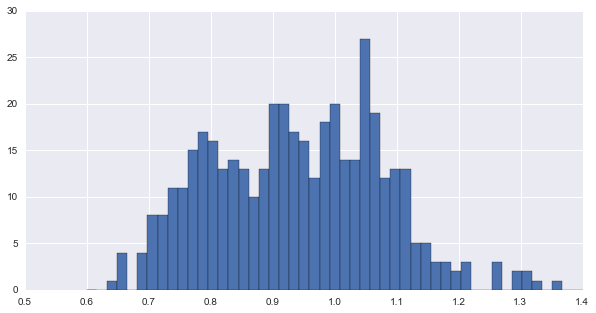

In [105]:
fig,ax = plt.subplots(figsize=(10,5))
plt.hist(g-i,bins=np.linspace(0.6,1.4,50))

In [148]:
import numpy as np
from scipy import stats
import emcee

default_param_labels = ['mean_blue_gi','mean_blue_ri','sig^2_blue_gi',\
	'sig^2_blue_ri','cov_blue','mean_red_gi','mean_red_ri','sig^2_red_gi','sig^2_red_ri','cov_red','f_blue']



class gcBimodal(object):
	def __init__(self,n_walkers,mc_scale=2.,data=None):
		
		if data is None:
			self.data = np.loadtxt('n3115_spec_conf.txt')
		else:
			self.data = data
		#self.data = self.data[self.data[:,0] < 0.95]
		self.n_walkers = n_walkers
		self.n_dim =11
		self.sampler = emcee.EnsembleSampler(self.n_walkers,self.n_dim,\
			self.lnLike,a=mc_scale)
		
		self.theta_init = [0.74207,0.1817,0.010297,0.00176,0.003345,1.075,0.40,0.004353,0.001478,0.001744,0.75]
		self.pos = [self.theta_init + 1.0e-4 * np.random.randn(self.n_dim) for j in range(self.n_walkers)]
		
			
	def runSampler(self,n_steps,plot=False,burn_steps=0.,print_stats=True):
		self.sampler.run_mcmc(self.pos,n_steps)
		self.pos = self.sampler.chain[:,-1,:]


		self.chain=self.sampler.chain[:,burn_steps:,:]

		if plot:
			self.makeTriangle(n_steps/5)

		if print_stats:
			self.calcStats()
		
	def lnLike(self,theta):
		self.ln_prior = self.lnPrior(theta)
		
		if not np.isfinite(self.ln_prior):
			return -np.inf
			
		mean_blue_gi = theta[0]
		mean_blue_ri = theta[1]
		sig_blue_gi = theta[2]
		sig_blue_ri = theta[3]
		cov_blue = theta[4]
		
		mean_red_gi = theta[5]
		mean_red_ri = theta[6]
		sig_red_gi = theta[7]
		sig_red_ri = theta[8]
		cov_red = theta[9]
		p_blue = theta[10]
		self.cov_matrix_blue = np.array([[sig_blue_gi,cov_blue],[cov_blue,sig_blue_ri]])
		self.cov_matrix_red = np.array([[sig_red_gi,cov_red],[cov_red,sig_red_ri]])
		
		self.mean_blue = np.array([mean_blue_gi,mean_blue_ri])
		self.mean_red = np.array([mean_red_gi,mean_red_ri])
		
		#inv_cov_blue = np.linalg.inv(self.cov_matrix_blue)
		#inv_cov_red = np.linalg.inv(self.cov_matrix_red)
		
		#det_blue = np.linalg.det(self.cov_matrix_blue)
		#det_red = np.linalg.det(self.cov_matrix_red)
		
		#diff_blue = self.data - self.mean_blue
		#diff_red = self.data - self.mean_red
		
		#n_points = self.data.shape[0]
		
		#self.ln_norm_blue = -1.*n_points*np.log(2*np.pi) - .5*n_points*np.log(det_blue)
		#self.ln_norm_red = -1.*n_points*np.log(2*np.pi) - .5*n_points*np.log(det_red)
				
		#self.ln_pdf_blue = np.zeros(n_points)
		#self.ln_pdf_red = np.zeros(n_points)
		#for i in range(n_points):
		#	self.ln_pdf_blue[i] = -0.5*np.dot(np.dot(diff_blue[i,:],inv_cov_blue),diff_blue[i,:].T)
		#	self.ln_pdf_red[i] = -0.5*np.dot(np.dot(diff_red[i,:],inv_cov_red),diff_red[i,:].T)
		
		#self.ln_prob_blue = np.sum(self.ln_pdf_blue) + self.ln_norm_blue + np.log(self.p_blue)
		#self.ln_prob_red = np.sum(self.ln_pdf_red) + self.ln_norm_red + np.log(1.-self.p_blue)
		
		#if not np.isfinite(self.ln_prob_blue) or not np.isfinite(self.ln_prob_red):
		#	print self.ln_prob_blue,self.ln_prob_red
		
		ln_prob_blue = np.log(p_blue) + stats.multivariate_normal.logpdf(self.data,mean=self.mean_blue,cov=self.cov_matrix_blue)
		ln_prob_red = np.log(1.-p_blue) + stats.multivariate_normal.logpdf(self.data,mean=self.mean_red,cov=self.cov_matrix_red)

		return self.ln_prior + np.sum(np.logaddexp(ln_prob_blue,ln_prob_red))
		
		
	def lnPrior(self,theta):
		mean_blue_gi = theta[0]
		mean_blue_ri = theta[1]
		sig_blue_gi = theta[2]
		sig_blue_ri = theta[3]
		cov_blue = theta[4]
		
		mean_red_gi = theta[5]
		mean_red_ri = theta[6]
		sig_red_gi = theta[7]
		sig_red_ri = theta[8]
		cov_red = theta[9]
		p_blue = theta[10]
		cov_matrix_blue = np.array([[sig_blue_gi,cov_blue],[cov_blue,sig_blue_ri]])
		cov_matrix_red = np.array([[sig_red_gi,cov_red],[cov_red,sig_red_ri]])
		
		#mean_blue = np.array([mean_blue_gi,mean_blue_ri])
		#mean_red = np.array([mean_red_gi,mean_red_ri])
		ln_prior_blue = np.log(np.linalg.det(cov_matrix_blue)**(-1.5))
		ln_prior_red = np.log(np.linalg.det(cov_matrix_red)**(-1.5))

		if	0.0 < p_blue < 1.0:
			p_blue_prior = 0.0
		else: p_blue_prior = -np.inf
		
		if	(0.0 < mean_blue_gi) and (mean_blue_gi < mean_red_gi):
			mean_blue_gi_prior = 0.0
		else: 
			mean_blue_gi_prior = -np.inf
		
		if	(0.0 < mean_blue_ri) and (mean_blue_ri < mean_red_ri):
			mean_blue_ri_prior = 0.0
		else: 
			mean_blue_ri_prior = -np.inf
		
		if	10.0 > mean_red_gi > 0.8:
			mean_red_gi_prior = 0.0
		else: 
			mean_red_gi_prior = -np.inf
	
		if	10.0 > mean_red_ri > 0.25:
			mean_red_ri_prior = 0.0
		else: 
			mean_red_ri_prior = -np.inf
		
		if	1.0 > sig_blue_gi > 0.0001:
			sig_blue_gi_prior = 0.0
		else: 
			sig_blue_gi_prior = -np.inf
		
		if	1.0 > sig_blue_ri > 0.0001:
			sig_blue_ri_prior = 0.0
		else: 
			sig_blue_ri_prior = -np.inf
		
		if	1.0 > sig_red_gi > 0.0001:
			sig_red_gi_prior = 0.0
		else: 
			sig_red_gi_prior = -np.inf
		
		if	1.0 > sig_red_ri > 0.0001:
			sig_red_ri_prior = 0.0
		else: 
			sig_red_ri_prior = -np.inf
		
		if	0.5 > cov_blue > 0.0001 and np.abs(cov_blue**2 / sig_blue_ri / sig_blue_gi) < 1.0:
			cov_blue_prior = ln_prior_blue
		else: 
			cov_blue_prior = -np.inf
		
		if	0.5 > cov_red > 0.0001 and np.abs(cov_red**2 / sig_red_ri / sig_red_gi) < 1.0:
			cov_red_prior = ln_prior_red
		else: 
			cov_red_prior = -np.inf
			
		
		return sig_blue_ri_prior + cov_blue_prior + mean_blue_gi_prior + mean_blue_ri_prior + sig_blue_gi_prior +\
			mean_red_gi_prior + mean_red_ri_prior + sig_red_gi_prior + sig_red_ri_prior + \
			cov_red_prior + p_blue_prior
            #mean_blue_gi_prior + mean_blue_ri_prior + sig_blue_gi_prior +\

	def calcStats(self,print_stats=True,print_pgcs=False,high_range=84,low_range=16,n_burn=0.):
		'''
		Calculates medians and 84% Confidence intervals the parameters from self.chain
		'''
		flat_chain = self.chain[:,n_burn:,:].reshape(-1,self.n_dim)

		self.medians = np.median(flat_chain,axis=0)
		self.lows = np.percentile(flat_chain,low_range,axis=0)
		self.highs = np.percentile(flat_chain,high_range,axis=0)


		#Print out quantities
		if print_stats:
			for i in np.arange(self.n_dim):
				print default_param_labels[i]+' median, ',str(low_range),'%, and ',str(high_range),'% ',self.medians[i],'  ',\
					self.lows[i],'  ',self.highs[i]


		if print_pgcs:
			for i in np.arange(self.n_obs):
				j = i+self.n_dim-self.n_obs
				print 'p_gc',str(i),' median, 2.5%, and 97.5%:', self.medians[j],'  ',\
					self.lows[j],'  ',self.highs[j]

		return (self.medians,self.lows,self.highs)
		
		
		
		
		
		
		
		

(array([  0.,   0.,   2.,   4.,   4.,  12.,  12.,  16.,  16.,  23.,  15.,
         18.,  15.,  17.,  19.,  25.,  23.,  21.,  16.,  26.,  14.,  32.,
         23.,  17.,  17.,  10.,   5.,   4.,   4.,   3.,   1.,   1.,   2.,
          1.,   3.,   1.,   0.,   1.,   0.]),
 array([ 0.6       ,  0.62051282,  0.64102564,  0.66153846,  0.68205128,
         0.7025641 ,  0.72307692,  0.74358974,  0.76410256,  0.78461538,
         0.80512821,  0.82564103,  0.84615385,  0.86666667,  0.88717949,
         0.90769231,  0.92820513,  0.94871795,  0.96923077,  0.98974359,
         1.01025641,  1.03076923,  1.05128205,  1.07179487,  1.09230769,
         1.11282051,  1.13333333,  1.15384615,  1.17435897,  1.19487179,
         1.21538462,  1.23589744,  1.25641026,  1.27692308,  1.2974359 ,
         1.31794872,  1.33846154,  1.35897436,  1.37948718,  1.4       ]),
 <a list of 39 Patch objects>)

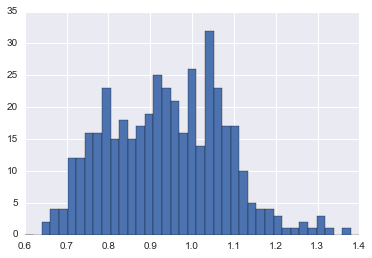

In [235]:
plt.hist(gi,bins=np.linspace(0.6,1.4,40))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.1       ,  0.11282051,  0.12564103,  0.13846154,  0.15128205,
         0.16410256,  0.17692308,  0.18974359,  0.2025641 ,  0.21538462,
         0.22820513,  0.24102564,  0.25384615,  0.26666667,  0.27948718,
         0.29230769,  0.30512821,  0.31794872,  0.33076923,  0.34358974,
         0.35641026,  0.36923077,  0.38205128,  0.39487179,  0.40769231,
         0.42051282,  0.43333333,  0.44615385,  0.45897436,  0.47179487,
         0.48461538,  0.4974359 ,  0.51025641,  0.52307692,  0.53589744,
         0.54871795,  0.56153846,  0.57435897,  0.58717949,  0.6       ]),
 <a list of 39 Patch objects>)

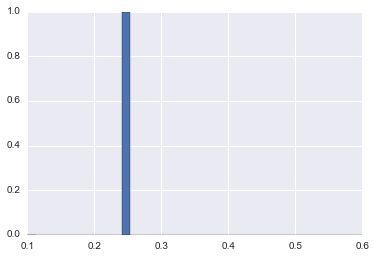

In [234]:
plt.hist(gi,bins=np.linspace(0.1,0.6,40))

In [236]:
class GMM(object):
    def __init__(self,n_walkers,mc_scale=2.,data=None):
        if data is None:
            self.data = np.loadtxt('n3115_spec_conf.txt')
        else:
            self.data = data
        #self.data = self.data[self.data[:,0] < 0.95]
        self.n_walkers = n_walkers
        self.n_dim =5
        self.sampler = emcee.EnsembleSampler(self.n_walkers,self.n_dim,\
            self.lnLike,a=mc_scale)

        self.theta_init = [0.9,0.1,1.05,0.1,0.5]
        self.pos = [self.theta_init + 1.0e-4 * np.random.randn(self.n_dim) * self.theta_init for j in range(self.n_walkers)]

        self.default_param_labels = ['mean_blue','sig_blue','mean_red','sig_red','p_blue']

    def runSampler(self,n_steps,plot=False,burn_steps=0.,print_stats=True):
        self.sampler.run_mcmc(self.pos,n_steps)
        self.pos = self.sampler.chain[:,-1,:]


        self.chain=self.sampler.chain[:,burn_steps:,:]

        if plot:
            self.makeTriangle(n_steps/5)

        if print_stats:
            self.calcStats()
            
    def lnLike(self,theta):
        self.ln_prior = self.lnPrior(theta)

        if not np.isfinite(self.ln_prior):
            return -np.inf

        mean_blue = theta[0]
        sig_blue = theta[1]

        mean_red = theta[2]
        sig_red = theta[3]
        
        p_blue = theta[4]

        ln_prob_blue = np.log(p_blue) + stats.norm.logpdf(self.data,loc=mean_blue,scale=np.sqrt(sig_blue))
        ln_prob_red = np.log(1.-p_blue) + stats.norm.logpdf(self.data,loc=mean_red,scale=np.sqrt(sig_red))

        return self.ln_prior + np.sum(np.logaddexp(ln_prob_blue,ln_prob_red))
    
    
    def lnPrior(self,theta):
        mean_blue = theta[0]
        sig_blue = theta[1]
        
        mean_red = theta[2]
        sig_red = theta[3]
        
        p_blue = theta[4]

        if 0.0 < p_blue < 1.0:
            p_blue_prior = 0.0#stats.beta.logpdf(p_blue,0.5,0.5)
        else: p_blue_prior = -np.inf

        if 0.0 < mean_blue < 0.99:
            mean_blue_prior = 0.0
        else: 
            mean_blue_prior = -np.inf

        if 10.0 > mean_red > 0.99:
            mean_red_prior = 0.0
        else: 
            mean_red_prior = -np.inf

        if 1.0 > sig_blue > 0.0001:
            sig_blue_prior = np.log(1./np.sqrt(sig_blue))
        else: 
            sig_blue_prior = -np.inf


        if 1.0 > sig_red > 0.0001:
            sig_red_prior = np.log(1./np.sqrt(sig_red))
        else: 
            sig_red_prior = -np.inf



        return sig_red_prior + sig_blue_prior + mean_blue_prior + mean_red_prior + p_blue_prior
    
    def calcStats(self,print_stats=True,print_pgcs=False,high_range=84,low_range=16,n_burn=0.):
        '''
        Calculates medians and 84% Confidence intervals the parameters from self.chain
        '''
        flat_chain = self.chain[:,n_burn:,:].reshape(-1,self.n_dim)

        self.medians = np.median(flat_chain,axis=0)
        self.lows = np.percentile(flat_chain,low_range,axis=0)
        self.highs = np.percentile(flat_chain,high_range,axis=0)


        #Print out quantities
        if print_stats:
            for i in np.arange(self.n_dim):
                print self.default_param_labels[i]+' median, ',str(low_range),'%, and ',str(high_range),'% ',self.medians[i],'  ',\
                    self.lows[i],'  ',self.highs[i]


        if print_pgcs:
            for i in np.arange(self.n_obs):
                j = i+self.n_dim-self.n_obs
                print 'p_gc',str(i),' median, 2.5%, and 97.5%:', self.medians[j],'  ',\
                    self.lows[j],'  ',self.highs[j]

        return (self.medians,self.lows,self.highs)

In [237]:
gmm = GMM(100,data=gi)
gmm.runSampler(500,burn_steps=250)
print gmm.sampler.acceptance_fraction



mean_blue median,  16 %, and  84 %  0.930206672373    0.810136294829    0.940847621947
sig_blue median,  16 %, and  84 %  0.0185820156984    0.0158828747863    0.0302959324292
mean_red median,  16 %, and  84 %  1.03614590719    0.991975634886    1.17661840677
sig_red median,  16 %, and  84 %  0.0699421238392    0.0226835106492    0.222097673504
p_blue median,  16 %, and  84 %  0.933906216592    0.0904663128789    0.981693161599
[ 0.194  0.284  0.34   0.364  0.304  0.318  0.326  0.37   0.178  0.324
  0.138  0.292  0.31   0.364  0.298  0.264  0.18   0.15   0.178  0.354
  0.356  0.344  0.3    0.296  0.33   0.186  0.196  0.296  0.32   0.186
  0.274  0.22   0.318  0.31   0.328  0.15   0.194  0.172  0.298  0.34
  0.318  0.188  0.348  0.184  0.27   0.332  0.344  0.3    0.314  0.308
  0.42   0.33   0.166  0.326  0.2    0.346  0.242  0.316  0.232  0.3    0.184
  0.27   0.176  0.366  0.312  0.348  0.334  0.234  0.174  0.264  0.344
  0.17   0.246  0.332  0.316  0.334  0.322  0.138  0.294  0.334  

/Users/zach/anaconda/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:92: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


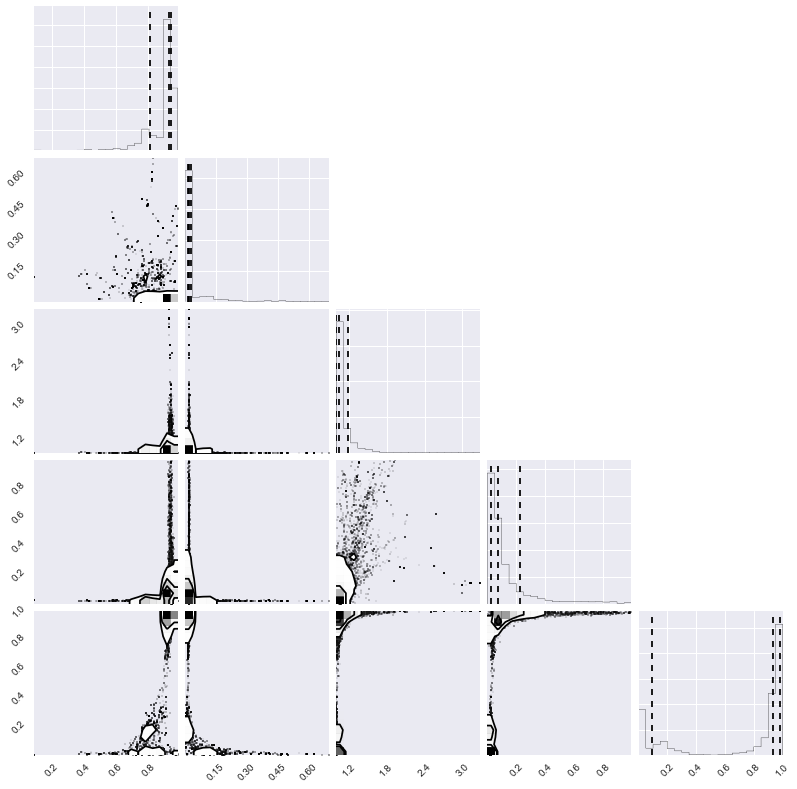

In [238]:
fig = corner.corner(gmm.sampler.chain[:,250:,:].reshape(-1,5),quantiles=[0.16, 0.5, 0.84])

IndexError: index 5 is out of bounds for axis 2 with size 5

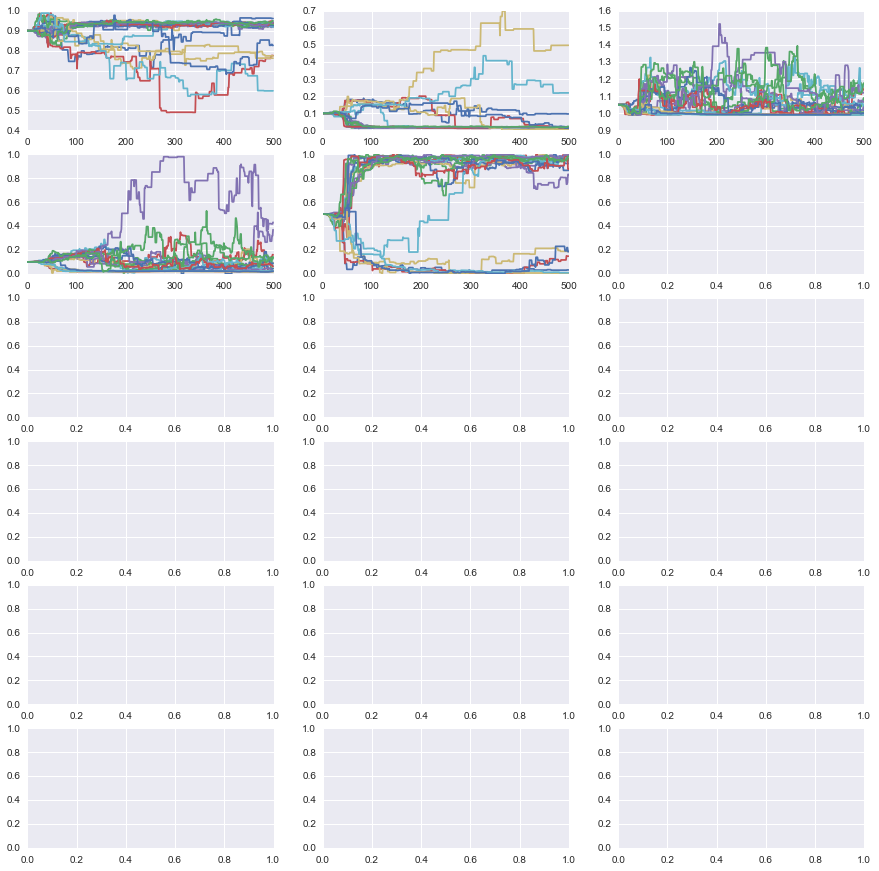

In [239]:
fig,ax = plt.subplots(figsize=(15,15),ncols=3,nrows=6,dpi=1000)

for i in range(17):
    for j in range(20):
        ax[i/3,i%3].plot(gmm.sampler.chain[j,:,i])